In [51]:
import collections
import csv
import itertools
import json
import datetime
import random
import time

#import ijson
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import numpy as np
import pandas as pd
import seaborn as sns
import tqdm

In [36]:
geo_data = {}
with open("2023_data_geolocated_only.csv") as csv_file:
    reader = csv.DictReader(csv_file)
    missing_field_count = 0
    for row in reader:
        if not row.get("user_id") or not row.get("country"):
            missing_field_count += 1
            continue
        geo_data[row["user_id"]] = row["country"]
    print(f"Had {missing_field_count} rows with missing fields")


Had 0 rows with missing fields


In [52]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

In [73]:
LIMIT = 10

country_count_post = collections.defaultdict(int)
country_count_libs = collections.defaultdict(int)
country_count_pairs = collections.defaultdict(int)

for language in LANGUAGES:
    print(f"Processing {language}")
    path_to_lib = f"data/results/{language}"

    with open(f"{path_to_lib}/{language}_libs_count.json") as handle:
        libs_count = json.load(handle)

    with open(f"{path_to_lib}/{language}_{language}_post_stats.json") as handle:
        lib_data = json.load(handle)
        print(f"We have {len(lib_data)} total posts")

    lib_have_seen = set()
    pair_have_seen = set()
    stats = collections.defaultdict(int)
    for data_item in tqdm.tqdm(lib_data):
        poster_id = data_item.get("poster_id")
        if not poster_id:
            stats["no poster id"] += 1
            continue
    
        country = geo_data.get(poster_id)
        if not country:
            stats["no country"] += 1
            continue

        country_count_post[country] += 1
        
        relevant_imports = [imp for imp in data_item.get("imports", []) if libs_count.get(imp, 0) > LIMIT]

        if not relevant_imports:
            stats["irrelevant post"] += 1
            continue

        if all(imp in lib_have_seen for imp in relevant_imports):
            stats["no novel lib"] += 1
        else:
            # NOVELTY FOUND, LET US DOCUMENT THE COUNTRY (ONLY ONCE PER POST!)
            country_count_libs[country] += 1
        
        for lib in relevant_imports:
            lib_have_seen.add(lib)
        stats["lib success"] += 1

        if all(pair in pair_have_seen for pair in itertools.combinations(relevant_imports, 2)):
            stats["no novel pair"] += 1
        else:
            # NOVELTY FOUND, LET US DOCUMENT THE COUNTRY (ONLY ONCE PER POST!)
            country_count_pairs[country] += 1

        for pair in itertools.combinations(relevant_imports, 2):
            pair_have_seen.add(pair)
        stats["pairs success"] += 1

    print(stats)


Processing python
We have 1358392 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1358392/1358392 [00:03<00:00, 382316.62it/s]


defaultdict(<class 'int'>, {'lib success': 681655, 'pairs success': 681655, 'irrelevant post': 13013, 'no novel pair': 642953, 'no novel lib': 677531, 'no country': 663724})
Processing r
We have 327074 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 327074/327074 [00:00<00:00, 432986.84it/s]


defaultdict(<class 'int'>, {'lib success': 161833, 'pairs success': 161833, 'no country': 161971, 'no novel pair': 151367, 'no novel lib': 160246, 'irrelevant post': 3270})
Processing javascript
We have 233986 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 233986/233986 [00:00<00:00, 356698.48it/s]


defaultdict(<class 'int'>, {'lib success': 119006, 'pairs success': 119006, 'irrelevant post': 9121, 'no novel lib': 116902, 'no novel pair': 107351, 'no country': 105859})
Processing java
We have 315370 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 315370/315370 [00:00<00:00, 439318.49it/s]


defaultdict(<class 'int'>, {'lib success': 147147, 'pairs success': 147147, 'no novel lib': 146848, 'no novel pair': 145858, 'no country': 167229, 'irrelevant post': 994})
Processing cpp
We have 54579 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 54579/54579 [00:00<00:00, 524972.12it/s]


defaultdict(<class 'int'>, {'lib success': 14391, 'pairs success': 14391, 'no country': 30740, 'no novel pair': 12810, 'irrelevant post': 9448, 'no novel lib': 13672})
Processing php
We have 114198 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 114198/114198 [00:00<00:00, 496840.56it/s]


defaultdict(<class 'int'>, {'lib success': 42854, 'no novel pair': 40543, 'pairs success': 42854, 'no novel lib': 41961, 'irrelevant post': 11396, 'no country': 59948})
Processing ruby
We have 37682 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 37682/37682 [00:00<00:00, 377925.94it/s]


defaultdict(<class 'int'>, {'no country': 13677, 'lib success': 21382, 'no novel pair': 19551, 'pairs success': 21382, 'irrelevant post': 2623, 'no novel lib': 21018})
Processing perl
We have 50826 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50826/50826 [00:00<00:00, 317381.88it/s]


defaultdict(<class 'int'>, {'lib success': 30185, 'no novel pair': 27662, 'pairs success': 30185, 'no country': 20081, 'no novel lib': 29919, 'irrelevant post': 560})
Processing rust
We have 21836 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21836/21836 [00:00<00:00, 395478.21it/s]


defaultdict(<class 'int'>, {'no country': 10095, 'lib success': 9496, 'no novel pair': 7332, 'pairs success': 9496, 'irrelevant post': 2245, 'no novel lib': 9073})
Processing swift
We have 52612 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52612/52612 [00:00<00:00, 400857.99it/s]


defaultdict(<class 'int'>, {'no country': 25505, 'lib success': 26406, 'no novel pair': 25184, 'pairs success': 26406, 'no novel lib': 26150, 'irrelevant post': 701})
Processing objectivec
We have 15801 total posts


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15801/15801 [00:00<00:00, 514579.19it/s]


defaultdict(<class 'int'>, {'irrelevant post': 4734, 'lib success': 3485, 'no novel pair': 3169, 'pairs success': 3485, 'no country': 7582, 'no novel lib': 3308})
Processing c#
We have 126252 total posts


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126252/126252 [00:00<00:00, 427575.37it/s]

defaultdict(<class 'int'>, {'lib success': 65128, 'no novel pair': 63871, 'pairs success': 65128, 'no novel lib': 64730, 'no country': 59632, 'irrelevant post': 1492})


In [74]:
TOP_N = 50
country_count_post = dict(collections.Counter(country_count_post).most_common(TOP_N))
country_count_libs = collections.Counter(country_count_libs)
country_count_pairs = collections.Counter(country_count_pairs)

In [75]:
DIGITS = 5
HIT_CNT_THRESHOLD = 10


libs_likelihoods =  {
    country: round(country_count_libs.get(country, 0) / country_count_post[country], DIGITS)
    for country, hits in country_count_post.items() if hits > HIT_CNT_THRESHOLD }
sorted_libs_likelihoods = sorted([item for item in libs_likelihoods.items() if item[1] > 0.001], key=lambda x: x[1], reverse=True)

pairs_likelihoods =  {
    country: round(country_count_pairs.get(country, 0) / country_count_post[country], DIGITS)
    for country, hits in country_count_post.items() if hits > HIT_CNT_THRESHOLD }
sorted_pairs_likelihoods = sorted([item for item in pairs_likelihoods.items() if item[1] > 0.001], key=lambda x: x[1], reverse=True)
print(len(sorted_libs_likelihoods))

50


In [76]:
country_count_libs

Counter({'United States': 3904,
         'United Kingdom': 988,
         'Germany': 737,
         'India': 723,
         'Canada': 515,
         'Australia': 391,
         'France': 349,
         'Netherlands': 262,
         'Switzerland': 196,
         'Russia': 178,
         'Brazil': 173,
         'Sweden': 167,
         'Italy': 167,
         'Spain': 164,
         'Poland': 161,
         'Israel': 129,
         'China': 122,
         'Denmark': 103,
         'Belgium': 95,
         'Norway': 94,
         'Ukraine': 88,
         'Singapore': 87,
         'New Zealand': 86,
         'Austria': 84,
         'Japan': 75,
         'Ireland': 67,
         'Portugal': 61,
         'Greece': 60,
         'Türkiye': 60,
         'South Africa': 54,
         'Pakistan': 53,
         'Romania': 52,
         'Finland': 51,
         'Czechia': 51,
         'Indonesia': 45,
         'Argentina': 43,
         'Philippines': 43,
         'Hong Kong SAR': 41,
         'Malaysia': 40,
         'Ira

In [77]:
country_count_pairs

Counter({'United States': 21196,
         'India': 6549,
         'United Kingdom': 5915,
         'Germany': 5234,
         'Canada': 2942,
         'France': 2438,
         'Australia': 2054,
         'Brazil': 1591,
         'Netherlands': 1565,
         'Russia': 1437,
         'Italy': 1205,
         'Poland': 1184,
         'Spain': 1146,
         'Switzerland': 1055,
         'China': 1044,
         'Sweden': 860,
         'Israel': 736,
         'Austria': 664,
         'Belgium': 614,
         'Türkiye': 610,
         'Ukraine': 595,
         'Japan': 583,
         'Denmark': 553,
         'Norway': 545,
         'Singapore': 542,
         'Pakistan': 541,
         'Ireland': 504,
         'Iran': 470,
         'Czechia': 439,
         'New Zealand': 379,
         'South Africa': 377,
         'Romania': 373,
         'Portugal': 366,
         'South Korea': 365,
         'Finland': 364,
         'Greece': 362,
         'Mexico': 347,
         'Indonesia': 338,
         'Phili

In [72]:
country_count_post["Slovakia"]

9251

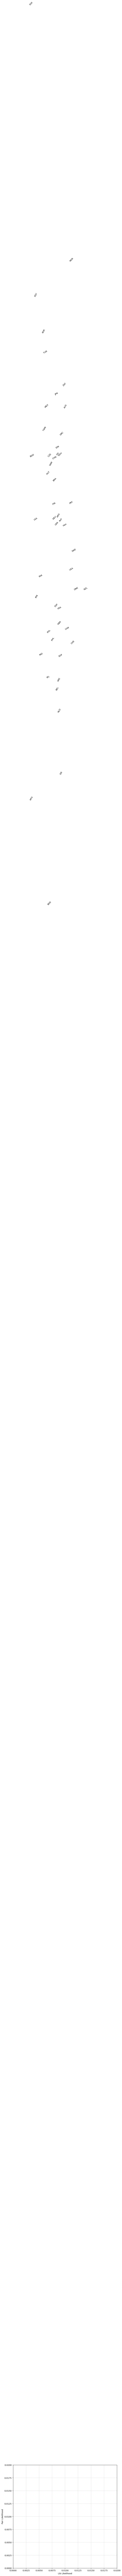

In [70]:
import pycountry

def country_name_to_code(country_name):
    try:
        # Lookup country by name
        country = pycountry.countries.lookup(country_name)
        return country.alpha_3
    except LookupError:
        return country_name[:3]

x = [libs_likelihoods[k] for k in sorted(libs_likelihoods.keys())]
y = [pairs_likelihoods[k] for k in sorted(pairs_likelihoods.keys())]

# Create scatter plot
plt.figure(figsize=(9,9))
plt.scatter(x, y, s=[50 for _ in range(len(x))], c=["red" for _ in range(len(x))])
for i, label in enumerate(sorted(libs_likelihoods.keys())):
    plt.text(x[i], y[i], country_name_to_code(label), fontsize=10, ha='left', rotation=random.choice([30,45, 60]))

plt.xlabel('Lib Likelihood')
plt.ylabel('Pair Likelihood')
plt.ylim(0, 0.02)
plt.xlim(0, 0.02)
plt.grid(alpha=0.5)

# Plots

In [27]:
chrysler_blue = "#3123D0"
mellow_blue = "#448AEB"
ripe_red = "#DC0B0B"

In [28]:
def renamer(name):
    resp = {
        "Bosnia and Herzegovina": "Bosnia",
        "United Arab Emirates": "U.A.E.",
    }.get(name)
    return resp or name

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 20), sharey=False)

categories, values = list(zip(*country_count_libs.most_common()[::-1]))
categories = [renamer(category) for category in categories]
bars = ax1.barh(categories, values, alpha=0.5)

ax1.set_xlabel('Number of Posts with Novel Libraries', fontsize=12)
ax1.set_ylabel('Country', fontsize=12)
ax1.margins(y=0.001)
ax1.grid(alpha=0.5)
ax1.semilogx()


for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax1.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
        str(value),                     # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=8,                     # Font size
    )

categories, values = list(zip(*country_count_pairs.most_common()[::-1]))
bars = ax2.barh(categories, values,  alpha=0.5)

ax2.set_xlabel('Number of Posts with Novel Pairs', fontsize=12)
ax2.set_ylabel('')
ax2.margins(y=0.001)
ax2.grid(alpha=0.5)
ax2.semilogx()


for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax2.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
        str(value),                     # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=8,                     # Font size
    )

plt.tight_layout()
plt.savefig("sheer_counts.png")

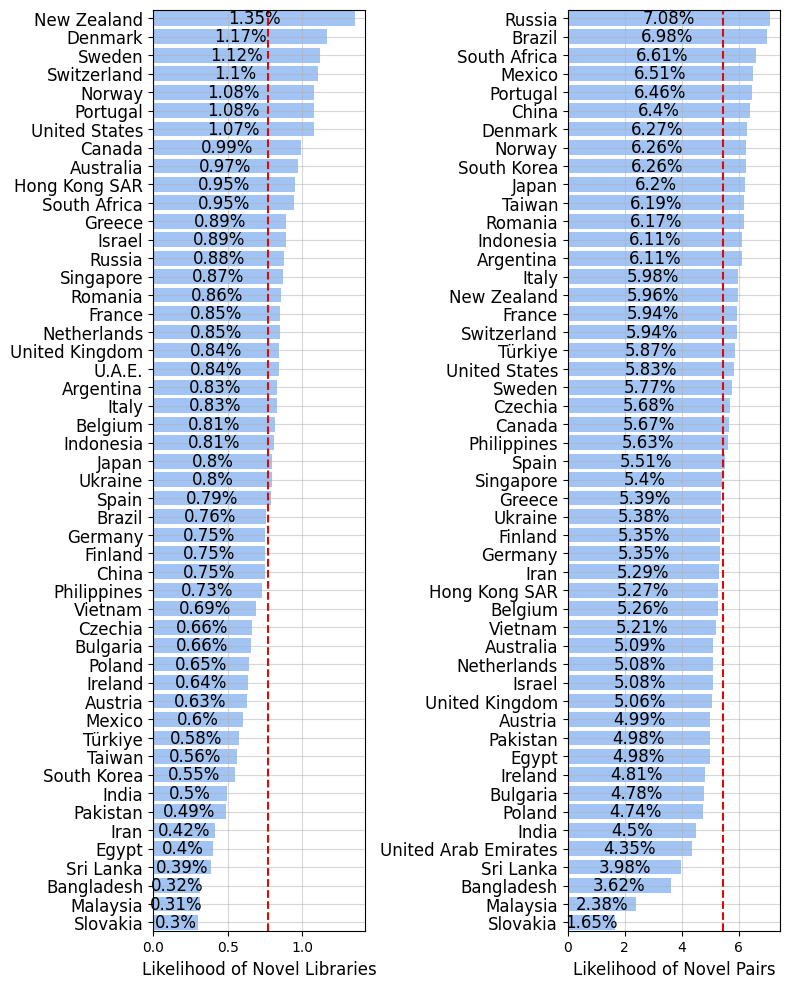

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 10), sharey=False)

categories, values = list(zip(*sorted_libs_likelihoods[::-1]))
categories = [renamer(category) for category in categories]
values = [100 * v for v in values]
avg_value = np.mean(values)

bars = ax1.barh(categories, values, color=mellow_blue, alpha=0.5)

ax1.set_xlabel('Likelihood of Novel Libraries', fontsize=12)
ax1.tick_params(axis='y', labelsize=12) 
for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax1.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
        f"{round(value, 2)}%",                     # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=12,                     # Font size
    )
ax1.grid(alpha=0.5)
ax1.axvline(avg_value, linestyle="--", color=ripe_red)
ax1.margins(y=0.001)

categories, values = list(zip(*sorted_pairs_likelihoods[::-1]))
values = [100 * v for v in values]
avg_value = np.mean(values)

bars = ax2.barh(categories, values, color=mellow_blue, alpha=0.5)

ax2.set_xlabel('Likelihood of Novel Pairs', fontsize=12)
ax2.tick_params(axis='y', labelsize=12)

for index, (bar, value) in enumerate(zip(bars, values)):
    x_position = bar.get_width() / 2
    ax2.text(
        x_position,            # X position (center of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y position (center of the bar)
         f"{round(value, 2)}%",               # Text (the value itself)
        ha='center',                    # Horizontal alignment
        va='center',                    # Vertical alignment
        color='black',                  # Text color
        fontsize=12,                     # Font size
    )
ax2.grid(alpha=0.5)
ax2.axvline(avg_value, linestyle="--", color=ripe_red)
ax2.margins(y=0.001)

plt.tight_layout()

plt.savefig("Likelihoods.png")

# Percentage of users with geo location

In [33]:
LANGUAGES = {
    "python": "Python",
    "r": "R",
    "javascript": "Javascript",
    "java": "Java",
    "cpp": "C++",
    "php": "PHP",
    "ruby": "Ruby",
    "perl": "Perl",
    "rust": "Rust",
    "swift": "Swift",
    "objectivec": "Objective C",
    "c#": "C#",
}

In [34]:
import json

user_ids = set()
for language in LANGUAGES:
    print(f"Processing {language}")
    with open(f"data/results/{language}/{language}_user_to_posts.json") as handle:
        data = json.load(handle)
        user_ids |= set(data.keys())
        

Processing python
Processing r
Processing javascript
Processing java
Processing cpp
Processing php
Processing ruby
Processing perl
Processing rust
Processing swift
Processing objectivec
Processing c#


In [46]:
geo_data_user_ids = set(geo_data.keys())

In [47]:
len(geo_data_user_ids & user_ids) / len(user_ids)

0.3813940713101161

In [48]:
len(geo_data_user_ids - user_ids)

3718283

In [49]:
geo_data_user_ids - user_ids

{'10854060',
 '7622174',
 '3729830',
 '10073351',
 '266288',
 '14956898',
 '12348820',
 '9164486',
 '16492583',
 '10232751',
 '8547109',
 '15325844',
 '11841717',
 '8451599',
 '5587159',
 '12967750',
 '6102526',
 '5354947',
 '14782456',
 '1955275',
 '11129955',
 '7920315',
 '8369666',
 '11249210',
 '8605111',
 '9450768',
 '10767071',
 '15812567',
 '11839561',
 '10511708',
 '1603271',
 '17102989',
 '16788469',
 '7526315',
 '10373000',
 '7991752',
 '14688677',
 '13589987',
 '5956163',
 '7469215',
 '13792331',
 '7801315',
 '16109779',
 '7361339',
 '16524513',
 '8990084',
 '5307838',
 '570442',
 '6459857',
 '17633234',
 '11160418',
 '3058432',
 '10754533',
 '1135460',
 '10419839',
 '2937940',
 '8384811',
 '10778248',
 '11983332',
 '9118739',
 '10840021',
 '5669420',
 '557093',
 '11930601',
 '10785748',
 '2613357',
 '1266440',
 '1904480',
 '9224660',
 '7957547',
 '5500145',
 '2515394',
 '3365003',
 '10291138',
 '1162075',
 '16079073',
 '8422473',
 '13432794',
 '7837758',
 '6054307',
 '23026

In [50]:
len(geo_data_user_ids)

4086252